# 1. Naive Bayes with Categorical Features

## 1. Warmup I: Spam Filtering
Provided a set of $ N $ emails - each represented as a vector $ x_n $ of 1s and 0s indicating whether it does or does not contain each of $ D $ words in the vocabulary - labeled $ c_n $ as spam or not spam, the naive Bayes model is given by
$$ p(c_n, x_n) = p(c_n) \prod_{d=1}^D p(x_{nd} | c_n) $$

### a) Derive expressions for the parameters of this model in terms of the training data using maximum likelihood assuming that the data is independent and identically distributed.
The parameters are
$$ \pi := p(c = 1) \hspace{1 cm} \theta_{0d} := p(x_d = 1 | c = 0) \hspace{1 cm} \theta_{1d} := p(x_d = 1 | c = 1) $$

The likelihood of a parameter value given the data is equal to the probability of the data given the parameter value:
$$ L(\pi, \theta_{01}, \dots, \theta_{0D}, \theta_{10}, \dots, \theta_{1D} | c_1, \dots, c_N, x_1, \dots, x_N) = p(c_1, \dots, c_N, x_1, \dots, x_N | \pi, \theta_{01}, \dots, \theta_{0D}, \theta_{10}, \dots, \theta_{1D}) $$
Because the data is independent and identically distributed
$$ p(c_1, \dots , c_N, x_1, \dots , x_N | \pi, \theta_{01}, \dots, \theta_{0D}, \theta_{10}, \dots, \theta_{1D})
= \prod_{n=1}^N p(c_n, x_n) = \prod_{n=1}^N \bigg( p(c_n) \prod_{d=1}^D p(x_{nd} | c_n) \bigg) $$
If we use the parameters, we get
$$ p(c, x | \pi, \theta) = \prod_{n=1}^N \bigg( \pi^{c_n}(1-\pi)^{1-c_n} \prod_{d=1}^D \big( \theta_{c_nd}^{x_{nd}}(1-\theta_{c_nd})^{1-x_{nd}} \big) \bigg) $$
To make things a little simpler later on, we'll take the natural log of the likelihood, since they both have the same maximum.
$$ ln(L(\pi, \theta | c, x)) = \sum_{n=1}^N \bigg( c_nln(\pi) + (1-c_n)ln(1-\pi) + \sum_{d=1}^D \big( x_{nd}ln(\theta_{c_nd}) + (1-x_{nd})ln(1-\theta_{c_nd}) \big) \bigg) $$
To find the maximum likelihood estimate of each parameter, we can then take the partial derivative of the log likelihood in relation to each parameter, set it equal to zero, and solve for the parameter value.

$$ \frac{\partial L(\pi)}{\partial \pi} = \sum_{n=1}^N \bigg( \frac{c_n}{\pi} - \frac{1-c_n}{1-\pi} \bigg) $$
Setting that equal to zero, we get
$$ 0 = \sum_{n=1}^N \bigg( \frac{c_n}{\hat{\pi}} - \frac{1-c_n}{1-\hat{\pi}} \bigg) = \sum_{n=1}^N \bigg( \frac{c_n - \hat{\pi}}{\hat{\pi}(1-\hat{\pi})} \bigg) $$
For a fraction to be equal to zero, the numerator must be equal to zero, so we are left with
$$ 0 = \sum_{n=1}^N (c_n - \hat{\pi}) $$
We can now distribute the sum. Because pi does not vary with $ n $, the sum of pi from 1 to $ N $ is pi times $ N $. Adding pi times $ N $ to both sides and dividing by $ N $, we get
$$ \hat{\pi} = \frac{1}{N} \sum_{n=1}^N c_n $$
We can similarly calculate the MLE of each theta
$$ \frac{\partial L(\theta_{cd})}{\partial \theta_{cd}} = \sum_{n=1}^N \bigg( \frac{x_{nd}}{\theta_{cd}} - \frac{(1-x_{nd})}{1-\theta_{cd}} \bigg)^{c_n = c_{\theta}} $$
Setting that equal to zero we get
$$ 0 = \sum_{n=1}^N \bigg( \frac{x_{nd}}{\hat{\theta}_{cd}} - \frac{1-x_{nd}}{1-\hat{\theta}_{cd}} \bigg)^{c_n = c_{\theta}} =  \sum_{n=1}^N \bigg( \frac{x_{nd}-\hat{\theta}_{cd}}{\hat{\theta}_{cd}(1-\hat{\theta}_{0d})} \bigg)^{c_n = c_{\theta}} $$
For a fraction to be equal to zero, the numerator must be equal to zero, so we are left with
$$ 0 = \sum_{n=1}^N (x_{nd}-\hat{\theta}_{cd})^{c_n = c_{\theta}} $$
Because the exponent is either one or zero, we can now add the number of instances in class $ c $ ($ N_c $) times theta to both sides and divide by $ N_c $ to get
$$ \hat{\theta}_{cd} = \frac{1}{N_c} \sum_{n=1}^N x_{nd}^{c_n=c_{\theta}} $$

### b) Given a trained model, explain how to form a classifier $ p(c|x) $ .
Using the MLE for each of the parameters, we can plug them in to the naive Bayes model
$$ p(c|x) = \hat{\pi} \prod_{d=1}^D \hat{\theta}_{cd}^{x_d}(1-\hat{\theta}_{cd})^{1-x_d} $$
Then, to classify a given instance, we can determine which value of $ c $ maximizes $ p(c|x) $ and classify $ x $ as most likely to belong to that class.

### c) If a given word never appears in the training set in a given class, what effect will this have on the classification of a new instance that contains said word?
If a word never appears in the training set in a given class, $ p(c|x_d) $ is zero. Because one of the probabilities being multiplied is zero, the entire probability $ p(c | x) $ becomes zero, indicating that the email cannot be categorized as belonging to that class. If there are only two classes, as in this case, that means that it is impossible for the email to be spam and therefore the email must be categorized as not spam.
One could counter this by using pseudo counts or Laplace smoothing. A small value is added to the probability of each word in the vocabulary for each class to ensure that none of them are equal to zero. The added value must be small to ensure that it does not overwhelm the actual probabilities. Alternatively, one could start with a Dirichlet prior, find the posterior distribution over the parameter values, and find the posterior predictive distribution, which does not have the same problem.
Given this problem, a spammer might try to fool a naive Bayes filter by using a few very uncommon words that are very unlikely to have appeared in the spam that the model was trained on. That way, even if the email is otherwise full of words that very strongly indicate that it is spam, the probability of one of the words being found in an email that is spam will be zero. That would make the entire probability of the email being spam zero, and thereby enable it to get through.


## 2. Warmup II: Customer Categorization.
A supermarket surveyed 6 customers as to which breakfast cereals (Cornflakes, Frosties, Sugar Puffs, Branflakes) they like. Each respondant generated a sequence of four ones and zeros with a one indicating that they like the corresponding cereal and a zero indicating that they dislike it. The respondants older than 60 provided the following data (1000), (1001), (1111), and (0001), customers under 60 responded (0110) and (1110). If a novel customer responds (0110), what is the probability that they are younger than 60?

We will make the naive Bayes assumption that respondants' preferences are indpendent. In that case
$$ p(< 60 | 0110) = \prod_{i = 0}^4 p(< 60 | x_i) $$
If we use Bayes' Rule, we get
$$ p(< 60 | 0110) = \prod_{i=0}^4 \frac{p(< 60) p(x_i | < 60)}{\sum_{age} p(age) p(x_i | age)} $$
We can then take $ p(x_i | < 60) $ to be a parameter whose MLE we can calculate. It turns out that
$$ p(x_i | < 60) = \frac{n_{cx_i}}{\sum_{i'=0}^4 n_{cx_i'}} $$
Where $ n_{cx_i} $ is the number of instances in the designated class where the $ i $th preference is equal to $ x_i $ (the new customer's $ i $th preference).
Using the data from the survey, we can calculate
$$ p(0110 | < 60) = \prod_{i=0}^4 \frac{n_{cx_i}}{\sum_{i'=0}^4 n_{cx_i'}} = \frac{1}{2} * \frac{2}{2} * \frac{2}{2} * \frac{2}{2} = \frac{1}{2} $$
Based on the survey, the probability that someone is udner 60 is
$$ p(< 60) = \frac{2}{6} = \frac{1}{3} $$
As for the normalizing constant in the denominator, we already have one component to it, all we need to do now is add the probability of a person being over 60 times the posterior probability of the new customer assumign that they are over 60.
$$ p(> 60) = \frac{4}{6} = \frac{2}{3} $$
$$ p(0110 | > 60) = \prod_{i=0}^4 \frac{n_{cx_i}}{\sum_{i'=0}^4 n_{cx_i'}} = \frac{1}{4} * \frac{1}{4} * \frac{1}{4} * \frac{1}{4} = \frac{1}{256} $$
Bringing it all together, we find that
$$ p(< 60 | 0110) = \prod_{i=0}^4 \frac{p(< 60) p(x_i | < 60)}{\sum_{age} p(age) p(x_i | age)} = \frac{ \frac{1}{3} * \frac{1}{2} }{ \frac{1}{3} * \frac{1}{2} + \frac{2}{3} * \frac{1}{256} } = \frac{64}{65} \approx .985 $$


## 3. Compact Naive Bayes Classification Using Matricies.
Consider a naive Bayes classification problem with $ C $ classes, where each instance has $ D $ features, and feature $ d $ has $ k_d $ possible categories. $ X $ is an input matrix where row $ n $ corresponds to instance $ n $ composed of a 1 followed by $ k_d $ columns for each feature - all but one of the column representing the category that instance $ n $ belongs to are zeros, while the one it belongs to is a one. The class prior probabilities are pi_c and the class conditional probabilities are theta_{cd}. Show that there exists a matrix $ A $ such that $ XA $ consists of unnormalized log posterior probabilities, where the $ n $th row corresponds to instance $ n $ and the $ c $th column corresponds to the posterior probability of being in class $ c $. Indicate each value $ a_{ic} $ in $ A $.

Each value $ v_{nc} $ in $ XA $ is the unnormalized log posterior probability that the $ n $th instance is in class $ c $. That is
$$ v_{nc} = log(p(c | x_n)) = log(p(c)p(x_n | c)) $$
We are making the naive Bayes assumption that all the features are independent so
$$ p(x_n | c) = \prod_{d=1}^D p(x_{nd} | c) $$
Where $ x_{nd} $ is the index of $ X $ that represents the category of attribute $ d $ that $ x_n $ belongs to. This can then be plugged into the equation for $ v_{nc} $
$$ v_{nc} = log(p(c)) + \sum_{d=1}^D log(p(x_{nd} | c)) $$
If we use MLE, we find that $ p(c) $ is the proportion of instances in class $ c $ and $ p(x_{nd} | c) $ is the proportion of instances in class $ c $ where $ x_{n'd} = x_{nd} $. That is to say
$$ p(c) = \frac{1}{N} \sum_{n=1}^N c_n^c(1-c_n)^{1-c} $$
$$ p(x_{nd} | c) = \frac{\sum_{n'=1}^N x_{n'd}^{(c_{n'} = c)}}{\sum_{n=1}^N c_n^c(1-c_n)^{1-c}} $$
If we plug that in, we get
$$ v_{nc} = log \big( \frac{1}{N} \sum_{n=1}^N c_n^c(1-c_n)^{1-c} \big) + \sum_{i=2}^I log \bigg( \frac{\sum_{n'=1}^N x_{n'i}^{(c_{n'} = c)}}{\sum_{n=1}^N c_n^c(1-c_n)^{1-c}} \bigg) $$
Where $ I $ is the total number of columns in $ X $.

Each value $ v_{nc} $ in $ XA $ is also the dot product of row $ n $ of $ X $ and column $ c $ of $ A $. This can be written as a sum
$$ v_{nc} = \sum_{i=2}^I x_{ni}a_{ic} $$
Where $ I $ is the total number of columns in $ X $ (and therefore the number of rows in $ A $).
Now, we can put the two pieces together to get
$$ log \big( \frac{1}{N} \sum_{n=1}^N c_n^c(1-c_n)^{1-c} \big) + \sum_{i=2}^I log \bigg( \frac{\sum_{n'=1}^N x_{n'i}^{(c_{n'} = c)}}{\sum_{n=1}^N c_n^c(1-c_n)^{1-c}} \bigg) = a_{1c} + \sum_{i=2}^I a_{ic} $$
If we take $ a_{1c} $ to be equal to $ log(p(c)) $
$$ a_{1c} = log \big( \frac{1}{N} \sum_{n=1}^N c_n^c(1-c_n)^{1-c} \big) $$
they can cancel each other out, leaving us with
$$ \sum_{i=2}^I log \bigg( \frac{\sum_{n'=1}^N x_{n'i}^{(c_{n'} = c)}}{\sum_{n=1}^N c_n^c(1-c_n)^{1-c}} \bigg) = \sum_{i=2}^I a_{ic} $$
We can now conclude that
$$ log \bigg( \frac{\sum_{n'=1}^N x_{n'i}^{(c_{n'} = c)}}{\sum_{n=1}^N c_n^c(1-c_n)^{1-c}} \bigg) = a_{ic} $$
For values of $ i $ from 2 to $ I $.


## 4. Cancer Screening.
Design a naive Bayes classifier that reports the probability that a novel cancer is malignant. Make one that uses maximum likelihood estimation and another that uses Bayesian estimation with conjugate priors.
First I need to make some helper functions.

In [1]:
import numpy

def trainnB(traindata):
    """ Returns the number of instances with a class label of one and each attribute value for each class. """
    
    # The number of training instances with a class label of 1
    c1 = numpy.sum(traindata[:, 1])
    # array to hold the number of training instances in each class with each value of each attribute
    attrs = numpy.zeros((2, 9, 10))
    
    # loop through each training instance and add its attribute values to attrs
    for inst in traindata:
        for dex in range(9):
            # don't include missing values
            if inst[dex+2] != -1:
                attrs[inst[1], dex, inst[dex+2]-1] += 1
    
    return c1, attrs



def testnB(testdata, results):
    """ Calculates the average sum squared error, misclassification rate,  precision, recall, and F1 score
    with a classification threshold of .5, given a testing set and the results of classification. """
    
    # running total sum-squared error
    error = 0
    # number of instances misclassified
    misclassed = 0
    # number of accurately predicted positives
    correctpos = 0
    # number of predicted positives
    predpos = 0
    # number of actual positives
    actpos = 0
    
    # loop through each testing instance and the corresponding result
    for inst in range(len(results)):
        # grab the actual label
        actl = testdata[inst, 1]
        # and the preditcted probability
        predprob = results[inst]
        # determine what the predicted probability means with a threshold of .5
        if predprob >= .5:
            predl = 1
            # and add 1 to the number of predicted positives
            predpos += 1
        else:
            predl = 0
        
        # add the sum squared error to error
        error += (actl - predprob)**2
        # determine if the instance was incorrectly classified
        if predl != actl:
            # and if so add 1 to the number of instances misclassified
            misclassed += 1
        # if the instance actually is malignant
        if actl == 1:
            # add 1 to the number of actual positives
            actpos += 1
            # if it was also classified as malignant, add 1 to the number of correct positives as well
            if predl == 1:
                correctpos += 1
        
    # now to calculate each of the evalutation metrics
    misclassification = misclassed/len(results)
    if predpos == 0:
        precision = 0
    else:
        precision = correctpos/predpos
    if actpos == 0:
        recall = 0
    else:
        recall = correctpos/actpos
    if (precision + recall) == 0:
        F1 = 0
    else:
        F1 = 2*precision*recall/(precision + recall)
    avgerror = error/len(results)
    # return a list conatining all of these metric values
    return [misclassification, precision, recall, F1, avgerror]
            

Now I can implement naive Bayes using MLE.

In [2]:
def MLEnB(traindata, testdata):
    """ A naive Bayes classifier that uses maximum likelihood estimation. """
    
    # train the classifier on the training set
    c1, attrs = trainnB(traindata)
    # calculate the number of instances that aren't malignant
    c0 = traindata.shape[0] - c1
    
    # A list to hold the probability that each test instance is malignant
    testresults = []
    # now calculate those probabilities
    for inst in testdata:
        # running probability that it is malignant starting with p(1)
        prob1 = c1/traindata.shape[0]
        # and that it isn't malignant starting with p(0)
        prob0 = 1-prob1
        for dex in range(9):
            # ignore missing values
            if inst[dex+2] != -1:
                prob1 *= attrs[1, dex, inst[dex+2]-1]/c1
                prob0 *= attrs[0, dex, inst[dex+2]-1]/c0
        # append the total normed probability for that instance to the results list
        testresults.append(prob1/(prob1+prob0))
    
    # return the results
    return testresults

And naive Bayes using Bayesian estimation and a conjugate prior.

In [3]:
def BayesiannB(traindata, testdata, sigma, alpha):
    """ A naive Bayes classifier that uses Bayesian estimation with a Dirichlet prior given lists of prior parameters
    for each value (which is the same for all attributes). """
    
    # train the classifier on the training set
    c1, attrs = trainnB(traindata)
    # calculate the number of instances that aren't malignant
    c0 = traindata.shape[0] - c1
    
    # A list to hold the probability that each test instance is malignant
    testresults = []
    # for each instance in the test set, calculate the posterior predictive
    for inst in testdata:
        # running probability that the instance is malignant, starting with the MLE of p(1)
        prob1 = c1/traindata.shape[0]
        # and that it isn't malignant starting with the MLE of p(0)
        prob0 = 1-prob1
        for dex in range(9):
            # grab the value of inst for this attribute
            val = inst[dex+2]-1
            # ignore missing values
            if val != -1:
                # calculate the posterior predictive for this attribute
                prob1 *= (alpha + attrs[1, dex, val])/(c1 + sigma*alpha)
                prob0 *= (alpha + attrs[0, dex, val])/(c0 + sigma*alpha)
        # append the total normed probability that instance is malignant to the results list
        testresults.append(prob1/(prob1+prob0))
    
    # return the results
    return testresults

### a) Explain the shortcomings of maximum likelihood estimation when it comes to zero counts.
To get the maximum likelihood estimate that a given instance is in a particular class, all the probabilities of each of the attribute values given that class are multiplied together. If it turns out that in the training set there wasn't an instance of a given attribute value belonging to an instance in that class, then the MLE of the probability of that attribute value given the class is equal to zero. Because everything is being multiplied to zero, one term being equal to zero makes the entire estimate equal to zero, implying that the instance cannot possibly be in that particular class no matter what the other attrbiute values are. Furthermore, if an instance has an attribute that didn't appear in any instance in the training set, then the MLE of the probability of it being in any class becomes zero.

### b) Explain why naive Bayes classification provides a natural method for handling missing values, whereas missing data is a problem for k-nearest-neighbors classification.
In naive Bayes classification, you can easily ignore missing attribute values and classify instances based on their other attributes. In k-nearest-neighbors, on the other hand, classification requires distances to be calculated between the novel instance and all of the training instances. If one attempted to ignore missing values, it would make all distances to that instance shorter purely by virtue of having one fewer dimension to calculate distance on. That would be the equivalent of saying that the instances have the same attribute value - a distance of zero - on the ignored axis, which could easily result in distant instances being used to classify a novel instance when ones that are actually closer are available.

### c) Use cross-validation to find the optimal parameters for the Bayesian classifier, assuming that the prior parameters are the same for each feature.

In [4]:
def crossvalid(traindata, k, sigma, alpha):
    """ Uses k-fold cross-validation on the training set to determine the optimal prior parameter values. """
    
    # calculate the size of each fold
    foldsize = traindata.shape[0]/k
    # take into account leftovers
    basesize = int(foldsize)
    leftovers = (foldsize-basesize)*k
    
    # total average sum squared error across validation sets
    error = 0
    
    # starting index for the next fold
    startdex = 0
    
    # for each fold, train and test the model
    for fold in range(k):
        # ending index for this fold
        enddex = startdex + basesize
        if fold < leftovers:
            enddex += 1
        # create the validation set
        validset = traindata[startdex:enddex, :]
        # and the training set around it
        trainset = numpy.append(traindata[:startdex, :], traindata[enddex:, :], axis = 0)
        
        # train the naive Bayes model and get the results
        results = BayesiannB(trainset, validset, sigma, alpha)
        # calculate the error and add it to error
        error += testnB(validset, results)[-1]
        
        # set the next starting index equal to the old end
        startdex = enddex
    
    # return the average error over the k folds
    return error/k

Now, I can actually run cross-validation.
I'll do grid search over a range of values of sigma and alpha.

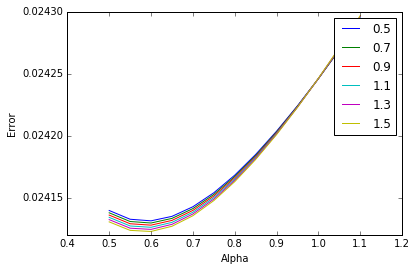

In [59]:
import matplotlib.pyplot as plt

# First I need to load the data set
trainset = numpy.loadtxt("cancer_train.csv", dtype = numpy.int16, delimiter = ",", skiprows = 1)
# seed random
numpy.random.seed(1)
# shuffle the training set
numpy.random.shuffle(trainset)

srange = numpy.arange(.5, 1.6, .2)
alrange = numpy.arange(.5, 1.1, .05)

# list to contain the average error for various values of sigma and alpha
errors = []

# now I can figure out the optimal values of sigma and alpha
for sigma in srange:
    # create a new list to add on to the end of the list of errors
    e = []
    for alpha in alrange:
        # add the average error from running k-fold cross-validation on the training set with a k of 5
        e.append(crossvalid(trainset, 5, sigma, alpha))
    # add the new list on to the end of the list of errors
    errors.append(e)

# turn the list of errors into a numpy array
errors = numpy.transpose(numpy.array(errors))
# plot the average error for each value of sigma
plt.plot(alrange, errors)
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend(srange)
plt.show()

### d) Report the misclassification rate, precision, recall, F1 score, and average sum-squared error for the final Bayesian model and MLE.

In [60]:
# load the testset
testset = numpy.loadtxt("cancer_test.csv", dtype = numpy.int16, delimiter = ",", skiprows = 1)

# classify the instances in the testset according to the Bayesian classifier and MLE and evaluate the results
Bayesian = testnB(testset, BayesiannB(trainset, testset, 1.5, .6))
MLE = testnB(testset, MLEnB(trainset, testset))
# list of metrics for convenience
metrics = ["misclassification", "precision", "recall", "F1", "sum-squared error"]

print("                      Bayesian       MLE")
# print out the results of each metric
for metric in range(5):
    print("%17s     %8f     %f" % (metrics[metric], Bayesian[metric], MLE[metric]))

                      Bayesian       MLE
misclassification     0.025751     0.055794
        precision     0.928571     0.857143
           recall     1.000000     1.000000
               F1     0.962963     0.923077
sum-squared error     0.025532     0.055719


# 2. Naive Bayes with Continuous Features

## 5. Classify digits as 9s or 5s based on demension-reduced images.

### a) Create scatterplots of a few different pairs of features color coded by digit type.

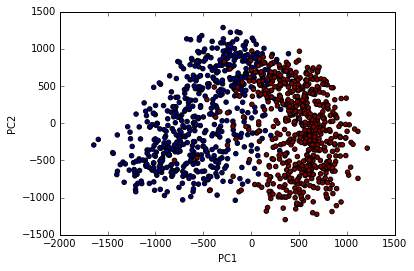

In [67]:
import matplotlib.pyplot as plt
import numpy

# first load up the training and test sets
trainset = numpy.loadtxt("digits_reduced_train.csv", delimiter = ",", skiprows = 1)
testset = numpy.loadtxt("digits_reduced_test.csv", delimiter = ",", skiprows = 1)

# compare by component 1 and component 2
plt.scatter(trainset[:, 1], trainset[:, 2], c = trainset[:, 0])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

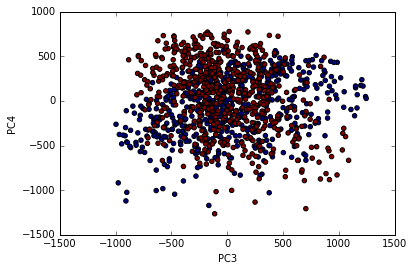

In [8]:
# compare by component 3 and component 4
plt.scatter(trainset[:, 3], trainset[:, 4], c = trainset[:, 0])
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.show()

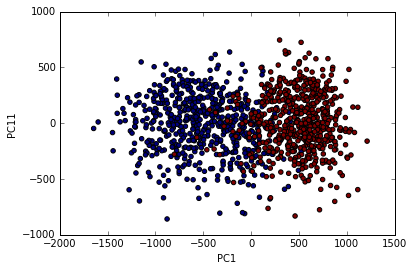

In [9]:
# compare by component 1 and component 11
plt.scatter(trainset[:, 1], trainset[:, 11], c = trainset[:, 0])
plt.xlabel("PC1")
plt.ylabel("PC11")
plt.show()

### b) Find the parameters for a Gaussian (mean and variance) of each class in the first two feature dimensions using MLE. 

In [68]:
# split the training set by class
train5 = trainset[:602, :]
train9 = trainset[602:, :]

# calculate the mean value for each of the first two features in each class
muPC1_5 = numpy.mean(train5[:, 1])
muPC1_9 = numpy.mean(train9[:, 1])
muPC2_5 = numpy.mean(train5[:, 2])
muPC2_9 = numpy.mean(train9[:, 2])

# and the variance
varPC1_5 = numpy.var(train5[:, 1])
varPC1_9 = numpy.var(train9[:, 1])
varPC2_5 = numpy.var(train5[:, 2])
varPC2_9 = numpy.var(train9[:, 2])

# print out the mean and variance for each component and class
print("                   5s                                   9s")
print("             Mu         Sigma squared             Mu         Sigma squared")
print("PC1     %f     %f         %f     %f         " % (muPC1_5, varPC1_5, muPC1_9, varPC1_9))
print("PC2     %f       %f         %f     %f         " % (muPC2_5, varPC2_5, muPC2_9, varPC2_9))

                   5s                                   9s
             Mu         Sigma squared             Mu         Sigma squared
PC1     -495.736908     167626.556795         499.052874     80716.544512         
PC2     88.402842       335393.991859         -88.994166     285125.274412         


### c) Use the resulting bivariate model to do naive Bayes classification on the test set. Report the misclassification rate.

In [71]:
import math

def MLEpred(mu, var, x):
    """ Returns the probability that a given instance belongs to a class given its parameters using MLE. """
    return (1/(math.sqrt(2*math.pi*var)))*math.exp((x-mu)**2/(2*var))


def classify(train5s, train9s, testset, misses = None, maxfeat = 12, prior = False):
    """ Classify each instance of the test set based on the training set and add to misses when it is incorrect. """
    
    if misses is None:
        misses = numpy.zeros(11)
    
    # probability of each class, to be multiplied by the probability of each class given each feature
    prob5 = math.log(train5s.shape[0]/(train5s.shape[0] + train9s.shape[0]))
    prob9 = math.log(train9s.shape[0]/(train5s.shape[0] + train9s.shape[0]))
    
    for f in range(1, maxfeat):
        # calculate the means of this feature
        mu5 = numpy.mean(train5s[:, f])
        mu9 = numpy.mean(train9s[:, f])
        
        # and the variances
        var5 = numpy.var(train5s[:, f])
        var9 = numpy.var(train9s[:, f])
        
        # classify each instance
        for inst in testset:
            # to do so, add the log probability of each class so far by the probability of that class given this feature
            if prior:
                # if there is a prior, use the posterior predictive
                prob5 += math.log(pospred(mu5, var5, inst[f]))
                prob9 += math.log(pospred(mu9, var9, inst[f]))
            else:
                # otherwise use the MLE
                prob5 += math.log(MLEpred(mu5, var5, inst[f]))
                prob9 += math.log(MLEpred(mu9, var9, inst[f]))
        
            # determine if the new classifications are accurate
            if (prob9 < prob5 and inst[0] == 9) or (prob5 < prob9 and inst[0] == 5):
                misses[f-1] += 1
            
    return misses

# print out the misclassification rate
print("Misclassification rate: " + str(classify(train5, train9, testset, maxfeat = 3)[1]/testset.shape[0]))

Misclassification rate: 0.5


### d) Use cross-validation to select the number of features to use.

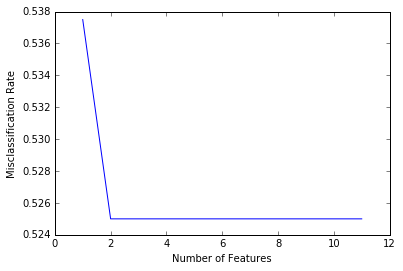

In [72]:
def crossvalidD(trainset, prior = False):
    
    # list of misclassification counts
    misses = numpy.zeros(11)
    
    # list of indexes of each instance in the trainset
    indexes = numpy.arange(trainset.shape[0])
    #seed random
    numpy.random.seed(1)
    # shuffle the list
    numpy.random.shuffle(indexes)
    
    # calculate the size of each fold
    foldsize = indexes.shape[0]/5
    # take into account leftovers
    basesize = int(foldsize)
    leftovers = (foldsize-basesize)*5
    
    # starting index for the next fold
    startdex = 0
    
    # for each fold, train and test the model
    for fold in range(5):
        # ending index for this fold
        enddex = startdex + basesize
        if fold < leftovers:
            enddex += 1
    
        # grab the indexes in the training set
        traindex = numpy.append(indexes[:startdex], indexes[enddex:])
        # and the indexes in the validation set
        validdex = indexes[startdex:enddex]
        
        # initialize trainsets of 9s and 5s
        train9s = numpy.empty((0, trainset.shape[1]))
        train5s = numpy.empty((0, trainset.shape[1]))
        
        # create a trainset of 9s and 5s
        for dex in traindex:
            if dex < 602:
                train5s = numpy.append(train5s, trainset[dex, :].reshape(1, trainset.shape[1]), axis = 0)
            else:
                train9s = numpy.append(train9s, trainset[dex, :].reshape(1, trainset.shape[1]), axis = 0)
        # and a validation set
        validset = trainset[validdex]
        
        classify(train5s, train9s, validset, misses = misses, prior = prior)
        
    # plot misclassification over number of features
    plt.plot(numpy.arange(1, 12), misses/trainset.shape[0])
    plt.xlabel("Number of Features")
    plt.ylabel("Misclassification Rate")
    plt.show()

crossvalidD(trainset)



This suggests that the optimal number of features is 2.

### e) Repeat the above using a Gamma prior on the inverse variances and MLE for the mean. Classify instances using the posterior predictive distribution.

To use the posterior predictive, we must first determine the paramters of the Gamma posterior on the inverse variance. We will start with a Gamma(.01, .01) prior.
$$ p((\sigma^2_d)^{-1} | a = .01, b = .01) = \frac{.01^{.01}((\sigma^2_d)^{-1})^{.01-1}e^{-(\sigma^2_d)^{-1}.01}}{\Gamma(.01)} $$
Then the posterior on the inverse variance is
$$ p((\sigma^2_d)^{-1} | x) = \frac{p((\sigma^2_d)^{-1})p(x | (\sigma^2_d)^{-1})}{\int p((\sigma'^2_d)^{-1})p(x|(\sigma'^2_d)^{-1}) d(\sigma'^2_d)^{-1}} $$
We already know the prior on sigma as stated above. The probability of the data given the inverse variance is a Gaussian
$$ p(x|(\sigma^2_d)^{-1}) = \frac{1}{\sqrt{2\pi\sigma^2_d}} e^{-\frac{1}{2}(\sigma^2_d)^{-1}(x-\mu)^2} $$
where the mean (mu) is fixed.
Putting it all together, we get
$$ p((\sigma^2_d)^{-1} | x) = \frac{1}{\int p((\sigma'^2_d)^{-1})p(x|(\sigma'^2_d)^{-1}) d(\sigma'^2_d)^{-1}} \frac{.01^{.01}((\sigma^2_d)^{-1})^{.01-1}e^{-(\sigma^2_d)^{-1}.01}}{\Gamma(.01)}\frac{1}{\sqrt{2\pi\sigma^2_d}} e^{-\frac{1}{2}(\sigma^2_d)^{-1}(x-\mu)^2}
= \frac{.01^{.01}}{\Gamma(.01)\sqrt{2\pi}\int p((\sigma'^2_d)^{-1})p(x|(\sigma'^2_d)^{-1}) d(\sigma'^2_d)^{-1}}((\sigma^2_d)^{-1})^{-.49}e^{-(\sigma^2_d)^{-1}(.01+.5(x-\mu)^2)} $$

This leaves us with $ a = -.49 + 1 = .51 $ and $ b = .01+.5(x-\mu)^2 $

Then we just need to calculate the mean and $ (x - \mu)^2 $ to use the posterior predictive distribution
$$ p(x_{new} | a_{post} = .51 , b_{post} = .01+.5(x-\mu)^2, \mu) = \frac{\Gamma(1.01)}{\Gamma(.51)\sqrt{2\pi(.01+.5(x-\mu)^2)}}\bigg(1 + \frac{(x_{new}-\mu)^2}{2(.01+.5(x-\mu)^2)} \bigg)^{-1.01} $$

In [73]:
# first I'll turn the posterior predictive into a function

import math

def pospred(mu, varx, xnew):
    """ Returns the posterior predictive probability that xnew is in the class with parameters varx and mu """
    return (1 + ((xnew-mu)**2)/(2*math.pi*(.01 + .5*varx)))*math.gamma(1.01)/(math.gamma(.51)*math.sqrt(2*math.pi*(.01 + .5*varx)))

Now I can do naive Bayes classification on the test set using just the first two features.

In [74]:
print("Misclassification rate: " + str(classify(train5, train9, testset, maxfeat = 3, prior = True)[1]/testset.shape[0]))

Misclassification rate: 0.5


And do crossvalidation to find the optimal number of features to consider.

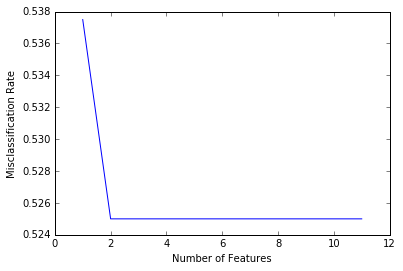

In [75]:
crossvalidD(trainset, prior = True)

# 3. Bayesian Linear Regression

## 6. A simplified approach.
Assume that we are using a constant noise variance model and have a Normal prior on $ w $ with likelihood
$$ t_n | x_n, w, \sigma^2 \stackrel{ind.}{\sim} N(x_nw, \sigma^2) $$

### a) Show that the posterior mean for $ w $ is equivalent to the ridge regression solution for some lambda and find that lambda.
The posterior on $ w $ is
$$ p(w | t, X, \sigma^2) = \frac{p(w)p(X | w)}{\int p(w')p(X | w') dw'} $$
The prior on $ w $ is
$$ p(w) \sim N(0,\sigma^2_0I = \Sigma_0) = \frac{1}{\sqrt{|2\pi\Sigma_0|}}e^{-\frac{1}{2}w^{\top}\Sigma_0^{-1}w} $$
$ p(X | w) $ is equal to the likelihood of $ t | X, w, \sigma^2I = \Sigma $ which is also a normal
$$ p(X|w) = \frac{1}{\sqrt{|2\pi\Sigma|}}e^{-\frac{1}{2}(t-Xw)^{\top}\Sigma^{-1}(t-Xw)} $$
Now we can put that together to get
$$ p(w | t, X, \Sigma) = k e^{-\frac{1}{2}w^{\top}\Sigma_0^{-1}w} e^{-\frac{1}{2}(t-Xw)^{\top}\Sigma^{-1}(t-Xw)} = k e^{-\frac{1}{2}w^{\top}\Sigma_0^{-1}w -\frac{1}{2}(t^{\top}-w^{\top}X^{\top})\Sigma^{-1}(t-Xw)} = k e^{-\frac{1}{2}(w^{\top}\Sigma_0^{-1}w + t^{\top}\Sigma^{-1}t - t^{\top}\Sigma^{-1}Xw - w^{\top}X^{\top}\Sigma^{-1}t + w^{\top}X^{\top}\Sigma^{-1}Xw)} $$
Where $ k $ is the constant
$$ k = \frac{1}{\int p(w')p(X | w') dw'} \frac{1}{\sqrt{|2\pi\Sigma_0|}} \frac{1}{\sqrt{|2\pi\Sigma|}} $$

To find the mean, we must now get
$$ w^{\top}\Sigma_0^{-1}w + t^{\top}\Sigma^{-1}t - t^{\top}\Sigma^{-1}Xw - w^{\top}X^{\top}\Sigma^{-1}t + w^{\top}X^{\top}\Sigma^{-1}Xw = w^{\top}(\Sigma_0^{-1} + X^{\top}\Sigma^{-1}X)w + t^{\top}\Sigma^{-1}t - t^{\top}\Sigma^{-1}Xw - w^{\top}X^{\top}\Sigma^{-1}t $$
into the form
$$ (w-\mu)^{\top}\Sigma'(w-\mu) = w^{\top}\Sigma'w - w^{\top}\Sigma'\mu - \mu^{\top}\Sigma'w + \mu^{\top}\Sigma'\mu $$
and solve for $ \mu $.

We can now take terms to be equal to each other based on whether they have $ w $ in them, such that
$$ w^{\top}\Sigma' w = w^{\top}(\Sigma_0^{-1} + X^{\top}\Sigma^{-1}X)w $$
That means
$$ \Sigma' = \Sigma_0^{-1} + X^{\top}\Sigma^{-1}X $$
We can then take
$$ w^{\top}\Sigma'\mu = w^{\top}(\Sigma_0^{-1} + X^{\top}\Sigma^{-1}X)\mu = w^{\top}X^{\top}\Sigma^{-1}t $$
Multiplying both sides by
$$ (w^{\top}(\Sigma_0^{-1} + X^{\top}\Sigma^{-1}X))^{-1} $$
we find that the mean is
$$ \mu = (\Sigma_0^{-1} + X^{\top}\Sigma^{-1}X)^{-1}X^{\top}\Sigma^{-1}t $$
$ \Sigma_0^{-1} = \sigma_0^{-2}I $ and $ \Sigma^{-1} = \sigma^{-2}I $, so that leaves us with
$$ \mu = (\sigma_0^{-2}I + X^{\top}\sigma^{-2}IX)^{-1}X^{\top}\sigma^{-2}It $$
We can distribute $ (\sigma^{-2})^{-1} $ across $ (\sigma_0^{-2} + X^{\top}\sigma^{-2}X)^{-1} $, we find that
$$ \mu = (\sigma_0^{-2}\sigma^{2}I + X^{\top}X)^{-1}X^{\top}t $$
Which is equivalent to the ridge regression solution
$$ \hat{w} = (\lambda I + X^{\top}X)^{-1}X^{\top}t $$
With $ \lambda = \sigma_0^{-2}\sigma^{2} $.


### b) Calculate the log marginal likelihood for different polynomial orders and different choices of sigma squared naught.

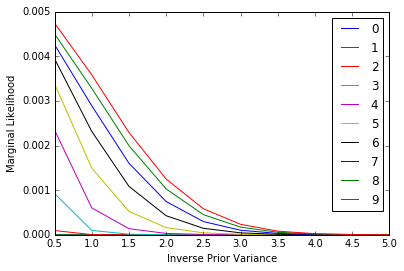

In [51]:
import numpy
import matplotlib.pyplot as plt
import math

# First I need to load the women's 100 dataset
womens100 = numpy.loadtxt("womens100.csv", delimiter = ",")

def likelihood(data, order, sigma):
    """ Graphs the likelihood of the data for a range of orders and prior values of inverse sigma squared. """
    
    # matrix of feature values
    features = numpy.zeros((data.shape[0], order+1))
    features[:, 0] = numpy.ones(data.shape[0])
    # empty matrix of likelihood values by order and prior variance
    likelihood = numpy.empty((order, len(sigma)))
    
    # for each order and value of sigma squared, fit the model and calculate the marginal likelihood
    for o in range(1, order+1):
        # add a new column to the feature matrix
        features[:, o] = data[:, 0]**o
        # normalize the latest column of feature values if the order isn't 0
        features[:, o] = features[:, o]/numpy.mean(features[:, o])
        features[:, o] = features[:, o]-numpy.mean(features[:, o])
        # save the new variance
        var = numpy.var(features)
        for s in range(len(sigma)):
            # calculate the posterior mean weight vector using ridge regression as determined above
            weights = numpy.dot(numpy.transpose(numpy.dot(
                numpy.linalg.inv(sigma[s]*var*numpy.identity(features.shape[0]) + 
                                 numpy.dot(features, numpy.transpose(features))), 
                features)), data[:, 1])
            
            # calculate the likelihood of the fit and add it to the likelihood matrix
            likelihood[o-1, s] = (numpy.exp(-numpy.dot(numpy.transpose(data[:, 1]-numpy.dot(features, weights)),
                                                     data[:, 1]-numpy.dot(features, weights))/(2*var))
                                  /math.sqrt(var*2*math.pi))
        
    
    # plot likelihood by order and sigma squared value
    plt.plot(sigma, numpy.transpose(likelihood))
    plt.legend(numpy.arange(order))
    plt.xlabel("Inverse Prior Variance")
    plt.ylabel("Marginal Likelihood")
    plt.show()

likelihood(womens100, 10, numpy.arange(.5, 5.5, .5))

## 7. Show that the joint posterior over the weights and variance is not seperable into a term depending only on the weights and a term depending only on the variance.
We assume that the prior on the weights is multivariate normal
$$ p(w) = \frac{1}{\sqrt{|2\pi\Sigma_0|}}e^{-\frac{1}{2}(w-\mu)^{\top}\Sigma_0^{-1}(w-\mu)} $$
And the prior on the variance is inverse Gamma
$$ p(\sigma^2) = \frac{b^a}{\Gamma(a)}(\sigma^2)^{-a-1}e^{-\frac{b}{\sigma^2}} $$
Because they are independent, the joint prior $ p(w, \sigma^2) = p(w)p(\sigma^2) $.
If we take the likelihood of the data to be $ t | X, w, \sigma^2 \sim N(Xw, \sigma^2) $ we get a posterior probability
$$ p(w, \sigma^2 | t, X) = k \frac{1}{\sqrt{|2\pi\Sigma_0|}}e^{-\frac{1}{2}(w-\mu)^{\top}\Sigma_0^{-1}(w-\mu)} \frac{b^a}{\Gamma(a)}(\sigma^2)^{-a-1}e^{-\frac{b}{\sigma^2}} \frac{1}{\sqrt{|2\pi\Sigma|}}e^{-\frac{1}{2}(t-Xw)^{\top}\Sigma^{-1}(t-Xw)} $$
Where $ k $ is a normalizing constant
$$ k = \frac{1}{\int \int p(w', \sigma'^2)p(w', \sigma'^2 | t, X) dw' d\sigma'^2} $$
Now we can combine terms to get the product of terms that look like a Normal and an inverse Gamma
$$ p(w, \sigma^2 | t, X) = k \frac{1}{\sqrt{4\pi^2\sigma_0^2\sigma^2}}e^{-\frac{1}{2}((w-\mu)^{\top}\Sigma_0^{-1}(w-\mu)+(t-Xw)^{\top}\Sigma^{-1}(t-Xw))} \frac{b^a}{\Gamma(a)}(\sigma^2)^{-a-1}e^{-\frac{b}{\sigma^2}} $$
To find the posterior parameters of the Normal we need to get
$$ (w-\mu)^{\top}\Sigma_0^{-1}(w-\mu)+(t-Xw)^{\top}\Sigma^{-1}(t-Xw) $$
$$ = w^{\top}\Sigma_0^{-1}w - w^{\top}\Sigma_0^{-1}\mu - \mu^{\top}\Sigma_0^{-1}w + \mu^{\top}\Sigma_0^{-1}\mu + w^{\top}X^{\top}\Sigma^{-1}Xw - w^{\top}X^{\top}\Sigma^{-1}t - t^{\top}\Sigma^{-1}Xw + t^{\top}\Sigma^{-1}t $$
$$ = w^{\top}(\Sigma_0^{-1}+X^{\top}\Sigma^{-1}X)w - w^{\top}(\Sigma_0^{-1}\mu+X^{\top}\Sigma^{-1}t) - (\mu^{\top}\Sigma_0^{-1}+t^{\top}\Sigma^{-1}X)w+(\mu^{\top}\Sigma_0^{-1}\mu+t^{\top}\Sigma^{-1}t) $$
into the form
$$ (w-\mu_{post})^{\top}\Sigma_{post}^{-1}(w-\mu_{post}) = w^{\top}\Sigma_{post}^{-1}w - w^{\top}\Sigma_{post}^{-1}\mu_{post} - \mu_{post}^{\top}\Sigma_{post}^{-1}w + \mu_{post}^{\top}\Sigma_{post}^{-1}\mu_{post} $$
And solve for $ \mu_{post} $ and $ \Sigma_{post} $.

We can take terms to be equal based on the arrangement of $ w $ terms such that
$$ w^{\top}\Sigma_{post}^{-1}w = w^{\top}(\Sigma_0^{-1}+X^{\top}\Sigma^{-1}X)w $$
This indicates that
$$ \Sigma_{post} = (\Sigma_0^{-1}+X^{\top}\Sigma^{-1}X)^{-1} $$
We can now use the value of $ \Sigma_{post} $ to find the value of $ \mu_{post} $.
We can set
$$ w^{\top}\Sigma_{post}^{-1}\mu_{post} = w^{\top}(\Sigma_0^{-1}+X^{\top}\Sigma^{-1}X)\mu_{post} = w^{\top}(\Sigma_0^{-1}\mu+X^{\top}\Sigma^{-1}t) $$
Multiplying both sides by $ (w^{\top}(\Sigma_0^{-1}+X^{\top}\Sigma^{-1}X))^{-1} $, we find that
$$ \mu_{post} = (\Sigma_0^{-1}+X^{\top}\Sigma^{-1}X)^{-1}(\Sigma_0^{-1}\mu+X^{\top}\Sigma^{-1}t) $$